Leer Texto de imagenes

In [34]:
import pytesseract
import cv2
import csv
import matplotlib.pyplot as plt
import numpy as np

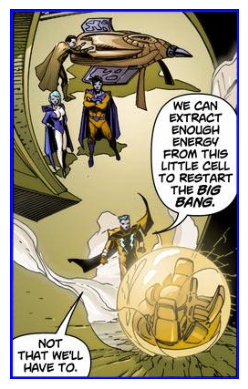

En la imagen se ha encontrado:  
Texto reconocido guardado en data\output\output_text\output_text_tesseract.csv


In [53]:
# Configura Tesseract para reconocimiento de texto en inglés
#Descargar tesseract y modificar la ruta una vez instalado: https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-5.3.4.20240503.exe
pytesseract.pytesseract.tesseract_cmd = r'E:\TESSERACT\tesseract.exe'

# Carga la imagen del cómic
image_path = 'data\output\divide_images\panel_3.jpg'
image = cv2.imread(image_path)

# Configura los parámetros de Tesseract para cómics
custom_config = r'--oem 3 --psm 3'

# Realiza el reconocimiento de texto en la imagen binarizada
text = pytesseract.image_to_string(image, lang='eng', config=custom_config)

#imprime la imagen
plt.imshow(image)
plt.axis('off')
plt.show()

# Texto que ha encontrado

print("En la imagen se ha encontrado: ", text)

# Escribir el texto reconocido en un archivo CSV
output_csv = 'data\output\output_text\output_text_tesseract.csv'
with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow([text])

print("Texto reconocido guardado en", output_csv)